In [1]:
import rand_data
import matplotlib.pyplot as plt
import sys
from __future__ import division

In [2]:
def add_one(data):
    for i in range(len(data)):
        data[i]=[1]+data[i]
    return data

def normalize_data(data):
    denom=0
    for i in range(len(data)):
        denom+=pow(data[i],2)
    denom=denom**0.5
    
    for i in range(len(data)):
        data[i]=data[i]/denom
    return data

def normalize_examples(data):
    for i in range(len(data)):        
        data[i][:3]=normalize_data(data[i][:3])  # [:3] to ignore last element(label)
    return data
    

def get_val(w,data):
    dot_prod=0
    for i in range(len(w)):
        dot_prod+=w[i]*data[i]
    return dot_prod * data[3]

def update_weight(w,data):
    for i in range(len(w)):
        w[i]+=data[i]*data[3]
    return w

def iterate_over_data(w,data):
    foundError=False
    for i in range(len(data)):
        if get_val(w,data[i]) <=0:
            w=update_weight(w,data[i])
            plot_graph(w,data)
            foundError=True
    return foundError,w


In [3]:
def plot_graph(w,data):
    pos_x=[]
    pos_y=[]
    neg_x=[]
    neg_y=[]
    for i in range(len(data)):
        if data[i][3]>0: #label
            pos_x.append(data[i][1])
            pos_y.append(data[i][2])
        else:
            neg_x.append(data[i][1])
            neg_y.append(data[i][2])

    #getting coordinates for weight vector line equation
    b,w1,w2 = w
    weight_x=[0,-b/w1]
    weight_y=[-b/w2,0]
    
    plt.scatter(pos_x,pos_y, c='r',label='Positive')
    plt.scatter(neg_x,neg_y, c='b',label='Negative')
    plt.plot(weight_x, weight_y,label='Weight Vec')
    
    legend = plt.legend(loc='upper right', shadow=True)
    plt.show()

In [4]:
def get_dist(w,data):  #using distance between line and point formula
    numerator= w[1]*data[1] + w[2]*data[2]+ w[0] #w[0] is our bias
    denominator=((w[1]**2)+(w[2]**2))**0.5
    return abs(numerator/denominator)
    
    
def get_margin(w,data):
    min_dist=sys.maxsize
    for i in range(len(data)):
        dist_from_point=get_dist(w,data[i])
        if dist_from_point<min_dist:
            min_point=data[i]
            min_dist=dist_from_point
    print("Margin of", min_dist, "by training instance",min_point[1:3], "and label", min_point[-1]) 

------------------
With n= 4


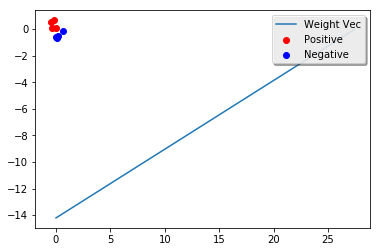

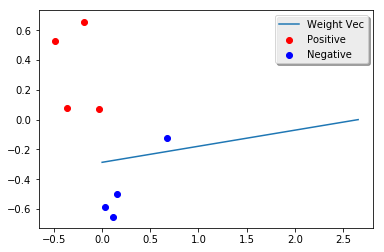

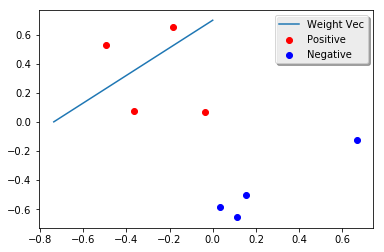

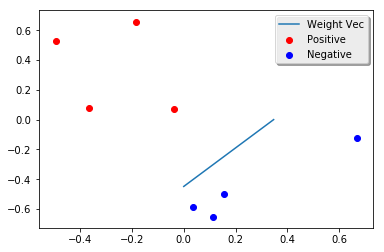

Final weights: [0.38349178223916625, -1.1048113597073206, 0.8545410114665336]
Margin of 0.11259607020262016 by training instance [0.03470369611232432, -0.5879376139379151] and label -1
------------------
With n= 10


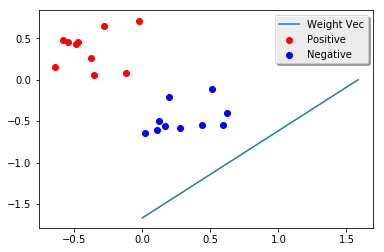

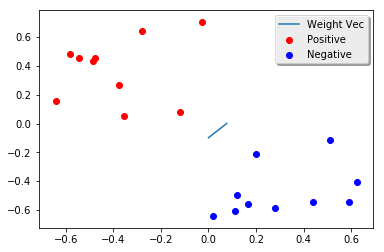

Final weights: [0.08437394060169745, -1.098814272218048, 0.855958654156191]
Margin of 0.2069233310679545 by training instance [-0.12081720199951614, 0.08304788202230555] and label 1
------------------
With n= 20


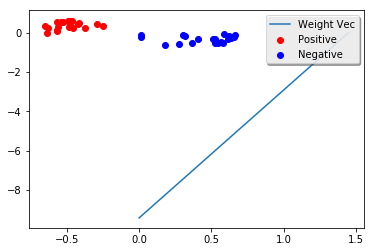

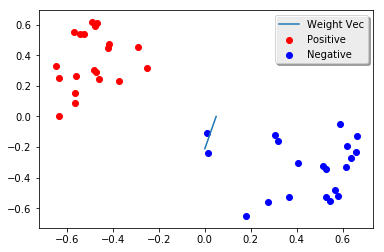

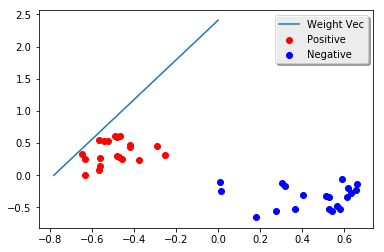

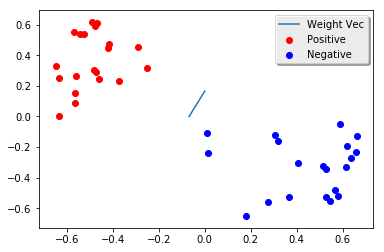

Final weights: [-0.11481266397013112, -1.678754107185947, 0.6934559260615225]
Margin of 0.11467787672417427 by training instance [0.0099955835060613, -0.1106074572720853] and label -1


In [5]:
for n in (4,10,20):
    
    data=rand_data.generateData(n)  #generate data
    data=add_one(data)              #add 1 to start of each instance    
    data=normalize_examples(data)   #normalize all examples
    w=data[0][:3]*data[0][3]        #w= a_1 * label_1
    
    print("------------------")
    print("With n=",n)
    plot_graph(w,data)
    
    foundError,w=iterate_over_data(w,data)
    while foundError:
        foundError,w=iterate_over_data(w,data)
        
    print("Final weights:", w)
    get_margin(w,data)
    

    
